In [1]:
%load_ext autoreload
%autoreload 2

## TWAP

## Selling lots of NXM to drive down price, then minting 50% through all rewards on cover buy with proceeds

In [2]:
from BondingCurveNexus.RAMM_protocol_det import RAMMProtocolDet

In [3]:
instance = RAMMProtocolDet()

In [17]:
print(instance.sell_nxm_price(), instance.buy_nxm_price())

0.0149062 0.021592085902974848


In [6]:
instance.book_value()

0.02137830287423252

In [10]:
instance.sell_liquidity_eth

2500

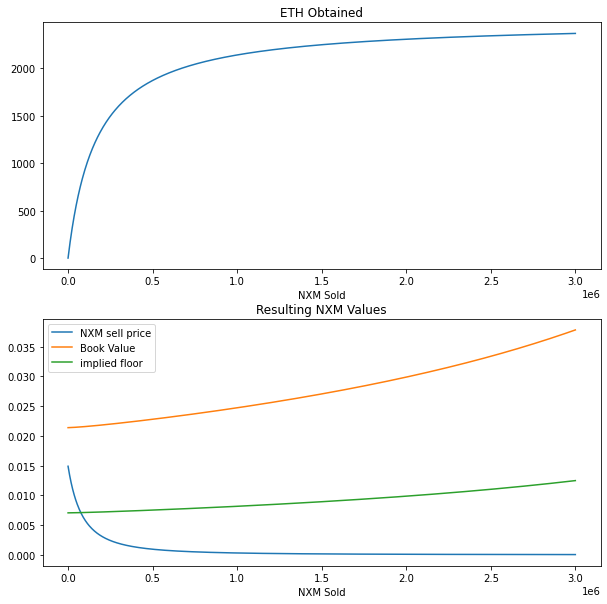

In [16]:
# sale size vs ETH obtained and closing price 
sale_sizes = np.linspace(100, 3_000_000, 1000)
eth_obtained = np.empty(len(sale_sizes))
nxm_resulting_prices = np.empty(len(sale_sizes))
book_values_resulting = np.empty(len(sale_sizes))
floor_perc_bv = 0.33

for n, n_nxm in enumerate(sale_sizes):
    sim = RAMMProtocolDet()
    sim.platform_nxm_sale(n_nxm)
    eth_obtained[n] = sim.eth_sold
    nxm_resulting_prices[n] = sim.sell_nxm_price()
    book_values_resulting[n] = sim.book_value()

fig, axs = plt.subplots(2, 1, figsize=(10,10))
axs[0].plot(sale_sizes, eth_obtained)
axs[0].set_title('ETH Obtained')
axs[0].set_xlabel('NXM Sold')
axs[1].plot(sale_sizes, nxm_resulting_prices, label='NXM sell price')
axs[1].plot(sale_sizes, book_values_resulting, label='Book Value')
axs[1].plot(sale_sizes, book_values_resulting * floor_perc_bv, label='implied floor')
axs[1].set_title('Resulting NXM Values')
axs[1].legend()
axs[1].set_xlabel('NXM Sold');

In [13]:
# NXM reward % from buying a cover
nxm_reward_ratio = 0.5

# introduce floor as % of book value for system NXM price
floor_perc_bv = 0.33
nxm_mint_prices = np.maximum(nxm_resulting_prices, floor_perc_bv*book_values_resulting)

nxm_minted = nxm_reward_ratio * eth_obtained / nxm_mint_prices
nxm_minted_no_floor = nxm_reward_ratio * eth_obtained / nxm_resulting_prices

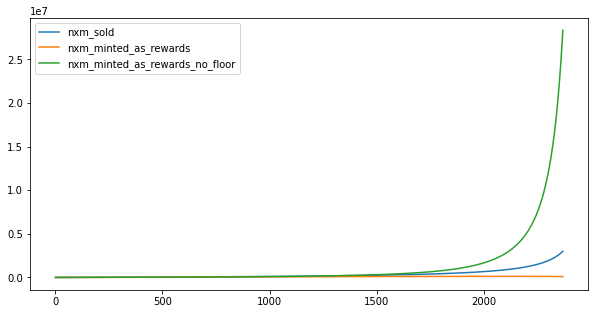

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(eth_obtained, sale_sizes, label='nxm_sold')
plt.plot(eth_obtained, nxm_minted, label='nxm_minted_as_rewards')
plt.plot(eth_obtained, nxm_minted_no_floor, label='nxm_minted_as_rewards_no_floor')
plt.legend()